# Advection equation

## Step function version

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a step function profile $u(x,t=0)= \begin{cases} 
      1 & x \in [4, 6] \\
      0 & \text{elsewhere} 
   \end{cases}
$, with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

### 1) Lax-Friedrichs method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define the step function of the problem:

def step_profile(x_array, x0):
    
    u_prof = []
    
    for x in (x_array - x0): 
        
        if x < 4 or x > 6: 
            
            u_prof.append(0)
            
        if x >= 4 and x <= 6: 
            
            u_prof.append(1)
            
    return np.array(u_prof)

Initial conditions: 

In [3]:
#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 501    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/np.abs(a)   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
x0=0
u_initial = step_profile(x, x0)

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 501
dx= 0.02
dt= 0.01
Number of iterations= 2000.0


In [4]:
# Initialize time and iteration counter
t = 0.0
i = 0

# add the array for the overall evolutions of the solutions over time: 

total_sol = []

#solve the advection equation
while t < t_final:
    
    total_sol.append(u_current)
    
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = 1 / 2 * (np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))    
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

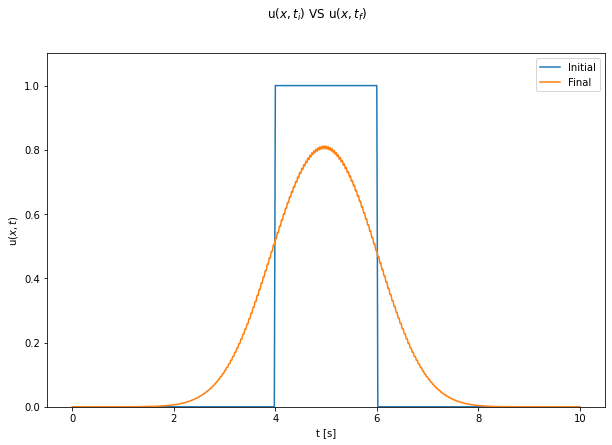

In [5]:
plt.figure(figsize = (10, 6.5))
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
#plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("$\mathrm{u}(x, t)$")
plt.suptitle("$\mathrm{u}(x, t_i)$ VS $\mathrm{u}(x, t_f)$")
plt.show()

See the values of the norm as time passes:

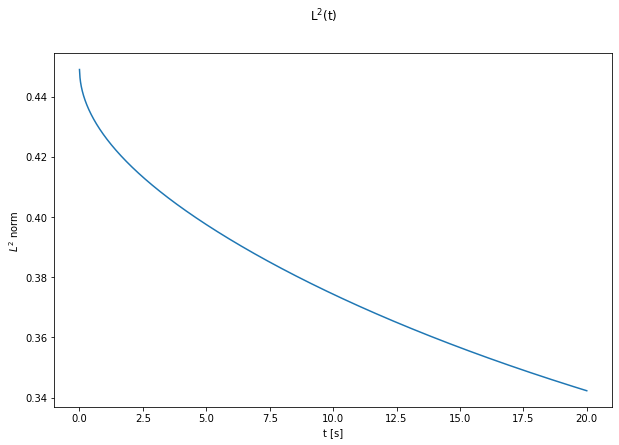

In [6]:
plt.figure(figsize = (10, 6.5))
plt.xlabel("t [s]")
plt.ylabel("$L^2$ norm")
plt.suptitle("$\mathrm{L^2(t)}$")
plt.plot(time,l2norm)
plt.show()

### FuncAnimation animations:

Here I just report an additional code I developed to see animation without having to save the images every time.

In [7]:
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


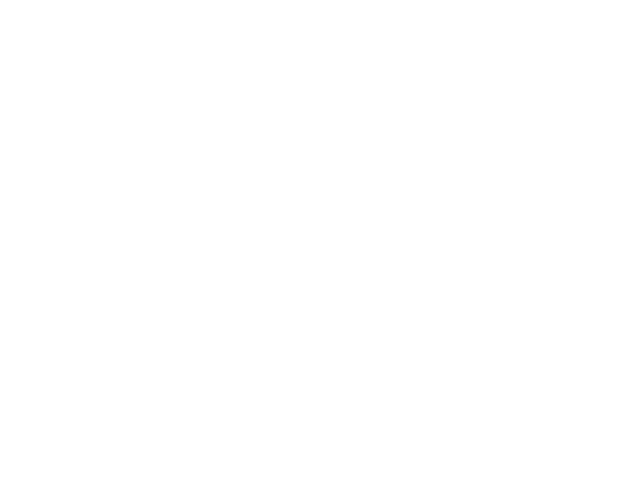

In [8]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('P')
plotLine, = ax.plot(x, np.zeros(len(x))*np.NaN, 'r-')
plotTitle = ax.set_title("t=0")
ax.set_ylim(0,1.5)
ax.set_xlim(0,10)


def solution(t):
    p = np.array(total_sol)[t]
    return p


def animate(t):
    pp = solution(t)
    plotLine.set_ydata(pp)
    plotTitle.set_text(f"step = {t:.1f}")
    #ax.relim() # use if autoscale desired
    #ax.autoscale()
    return [plotLine,plotTitle]



ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0, len(total_sol), 10), blit=True)
ani.save('u_stepLAX.gif')
plt.show()

### 1) LW method

Redefine initial conditions: 

In [9]:
x0=0
u_initial = step_profile(x, x0)

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

In [10]:
# Re-initialize time and iteration counter
t = 0.0
i = 0

# add the array for the overall evolutions of the solutions over time: 

total_sol = []

#solve the advection equation
while t < t_final:
    
    total_sol.append(u_current)
    
    # pluggin already the first half-step into the second: 
    
    u_next = u_current - a * dt / (2 * dx) * (np.roll(u_current, -1) - np.roll(u_current, +1)) + a**2 * dt**2 / (2 * dx**2) * (np.roll(u_current, -1) - 2 * u_current + np.roll(u_current, +1))
    
    
    # Update the solution
    u_current = u_next.copy()
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

<IPython.core.display.Javascript object>


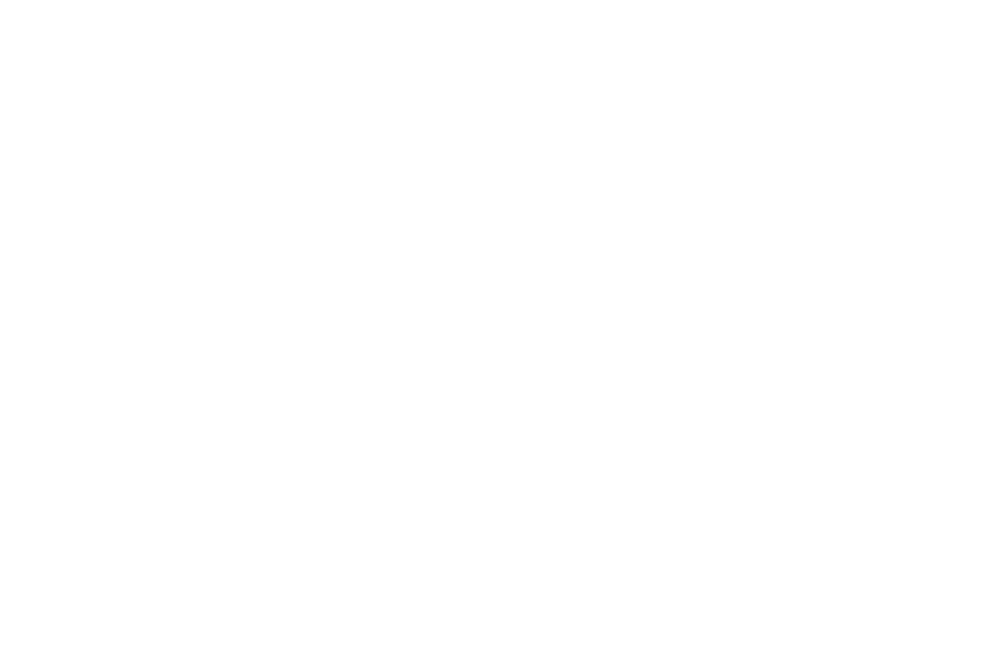

In [11]:
plt.figure(figsize = (10, 6.5))
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
#plt.title('Time='+str(round(t,2)))
plt.xlabel("t [s]")
plt.ylabel("$\mathrm{u}(x, t)$")
plt.suptitle("$\mathrm{u}(x, t_i)$ VS $\mathrm{u}(x, t_f)$")
plt.ylim(0, 1.1)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


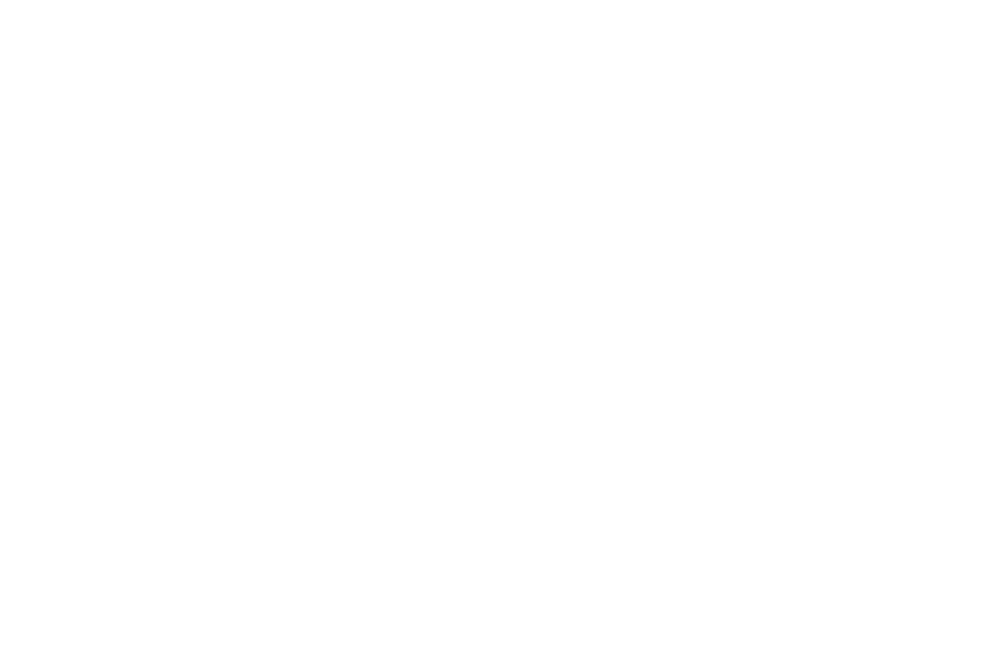

In [12]:
plt.figure(figsize = (10, 6.5))
plt.xlabel("t [s]")
plt.ylabel("$L^2$ norm")
plt.suptitle("$\mathrm{L^2(t)}$")
plt.plot(time,l2norm)
plt.show()

### FuncAnimation animations:

Again, I just report an additional code I developed to see animation without having to save the images every time.

<IPython.core.display.Javascript object>


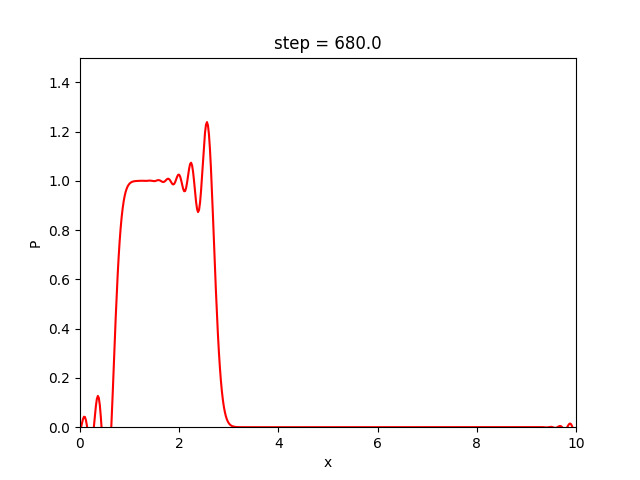

In [13]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('P')
plotLine, = ax.plot(x, np.zeros(len(x))*np.NaN, 'r-')
plotTitle = ax.set_title("t=0")
ax.set_ylim(0,1.5)
ax.set_xlim(0,10)


def solution(t):
    p = np.array(total_sol)[t]
    return p


def animate(t):
    pp = solution(t)
    plotLine.set_ydata(pp)
    plotTitle.set_text(f"step = {t:.1f}")
    #ax.relim() # use if autoscale desired
    #ax.autoscale()
    return [plotLine,plotTitle]



ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0, len(total_sol), 10), blit=True)
ani.save('u_stepLW.gif')
plt.show()